## Assignment: $k$ Means Clustering

## **Do two questions.**

`! git clone https://www.github.com/DS3001/kmc`

**Q1.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/fourchain40/kmc/main/data/airbnb_hw.csv')
df['price'] = df['Price']
df['beds'] = df['Beds']
df['num_reviews'] = df['Number Of Reviews']
df['score'] = df['Review Scores Rating']
X = df.loc[:,['price','beds','num_reviews','score']]
print(X.shape)
X.describe()

(30478, 4)


,beds,num_reviews,score
count,30393.000000,30478.000000,22155.000000
mean,1.530089,12.018735,91.993230
std,1.015359,21.980703,8.850373
min,0.000000,0.000000,20.000000
25%,1.000000,0.000000,89.000000
50%,1.000000,3.000000,94.000000
75%,2.000000,13.000000,100.000000
max,16.000000,257.000000,100.000000


In [ ]:
X['price'].value_counts()
X['price'] = X['price'].str.replace(',','')
X['price'] = pd.to_numeric(X['price'],errors='coerce')
X.describe()

,price,beds,num_reviews,score
count,30478.000000,30393.000000,30478.000000,22155.000000
mean,163.589737,1.530089,12.018735,91.993230
std,197.785454,1.015359,21.980703,8.850373
min,10.000000,0.000000,0.000000,20.000000
25%,80.000000,1.000000,0.000000,89.000000
50%,125.000000,1.000000,3.000000,94.000000
75%,195.000000,2.000000,13.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


In [ ]:
X['beds'] = X['beds'].fillna(1)
X.describe()

,price,beds,num_reviews,score
count,30478.000000,30478.000000,30478.000000,22155.000000
mean,163.589737,1.528611,12.018735,91.993230
std,197.785454,1.014327,21.980703,8.850373
min,10.000000,0.000000,0.000000,20.000000
25%,80.000000,1.000000,0.000000,89.000000
50%,125.000000,1.000000,3.000000,94.000000
75%,195.000000,2.000000,13.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


In [ ]:
pd.crosstab(df['score'].isnull(), df['num_reviews']>0)

num_reviews,False,True
score,,
False,0,22155
True,7814,509


The "num_reviews" variable looked clean.

In [ ]:
X = X.dropna()
X.describe()

,price,beds,num_reviews,score
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,154.787633,1.556985,16.505439,91.993230
std,148.836621,1.043273,24.308241,8.850373
min,10.000000,0.000000,1.000000,20.000000
25%,85.000000,1.000000,2.000000,89.000000
50%,125.000000,1.000000,7.000000,94.000000
75%,190.000000,2.000000,20.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).

In [ ]:
def maxmin(x):
    u = (x-min(x))/(max(x)-min(x))
    return u
Z = X.drop('price',axis=1)
Z = Z.apply(maxmin)

3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
model = KMeans(n_clusters = 6, max_iter = 300, n_init = 10, random_state = 0)
model = model.fit(Z)
Z['cluster'] = model.labels_

In [ ]:
Z.describe()

,beds,num_reviews,score,cluster
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,0.097312,0.060568,0.899915,2.040081
std,0.065205,0.094954,0.110630,1.473279
min,0.000000,0.000000,0.000000,0.000000
25%,0.062500,0.003906,0.862500,1.000000
50%,0.062500,0.023438,0.925000,1.000000
75%,0.125000,0.074219,1.000000,2.000000
max,1.000000,1.000000,1.000000,5.000000


4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.

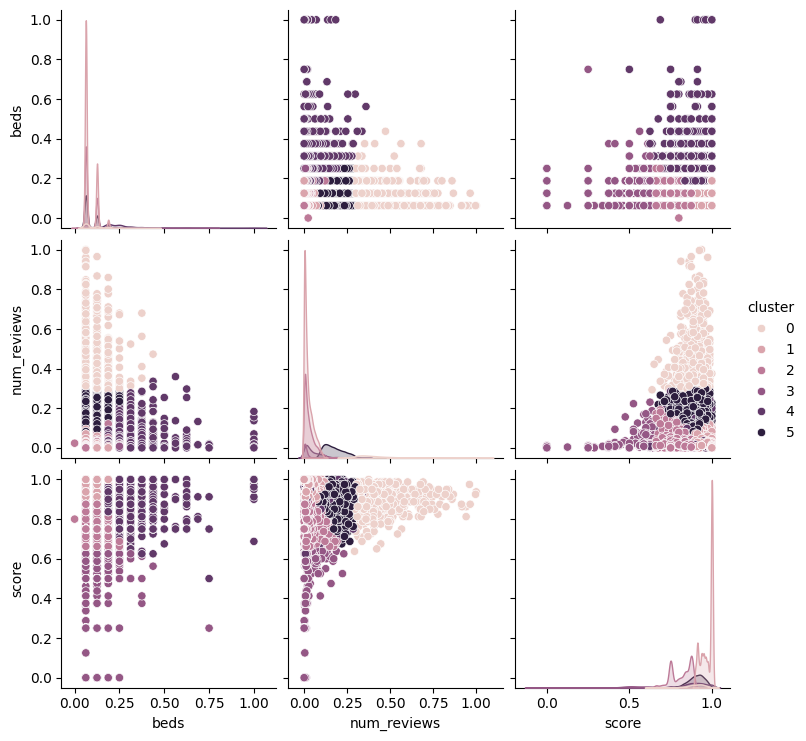

In [ ]:
import seaborn as sns
sns.pairplot(data=Z,hue='cluster')

5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?

In [ ]:
X['cluster'] = model.labels_
X.loc[:,['price','cluster'] ].groupby('cluster').describe()

price                                                              
           count        mean         std   min     25%    50%     75%      max
cluster                                                                       
0          794.0  133.238035   83.077776  27.0   80.00  110.0  168.50    875.0
1        10512.0  152.233352  147.281729  10.0   85.00  130.0  190.00  10000.0
2         5554.0  131.496579  102.621585  20.0   75.00  110.0  169.00   5000.0
3          632.0  133.587025  215.505565  25.0   65.00   99.0  151.25   5000.0
4         1633.0  293.458665  262.439199  27.0  150.00  229.0  350.00   4500.0
5         3030.0  141.674917   84.134011  22.0   87.25  125.0  175.00   1000.0

Cluster 4 has by far the highest rental prices, with a mean of about 293/night. Clusters 1 and 5 are also slightly more expensive than clusters 0, 2, and 3.

6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

Text(0.5, 1.0, 'Scree Plot')

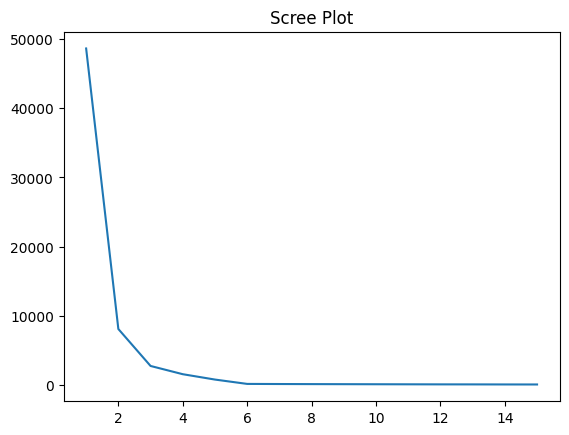

In [ ]:
import numpy as np
k_bar = 15
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    model = KMeans(n_clusters = k+1, max_iter = 300, n_init = 10, random_state = 0)
    model = model.fit(Z)
    SSE[k] = model.inertia_
sns.lineplot(x = k_grid, y = SSE).set_title('Scree Plot')

Picking 3 as the number of clusters.

price                                                            
           count        mean         std   min   25%    50%     75%      max
cluster                                                                     
0        11306.0  150.899345  143.791840  10.0  85.0  129.0  189.00  10000.0
1         4663.0  194.830152  184.264122  22.0  99.0  150.0  225.00   4500.0
2         6186.0  131.710152  119.136944  20.0  75.0  110.0  168.75   5000.0

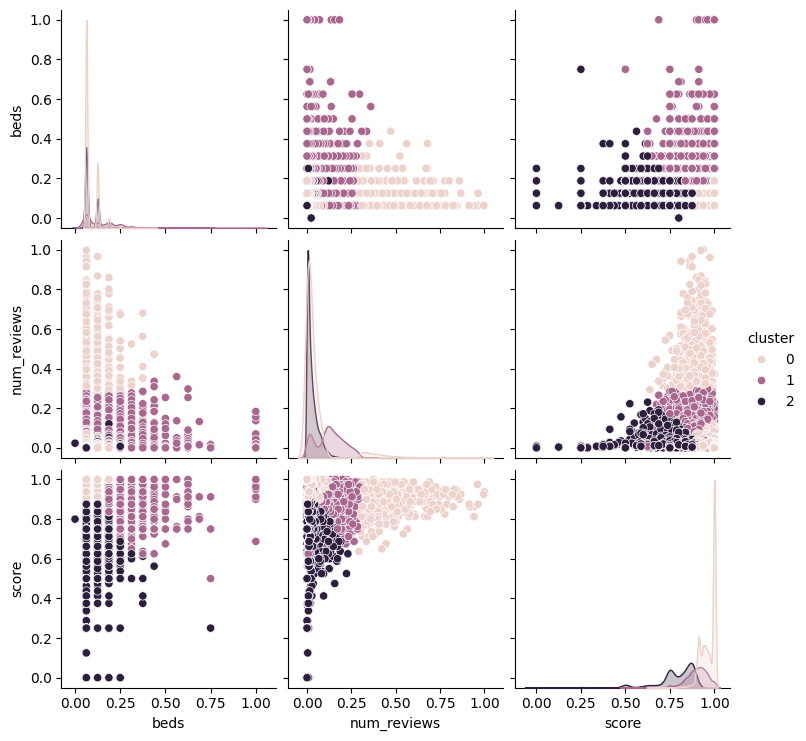

In [ ]:
model = KMeans(n_clusters = 3, max_iter = 300, n_init = 10, random_state = 0)
model = model.fit(Z)
Z['cluster'] = model.labels_
sns.pairplot(data=Z,hue='cluster')
X['cluster'] = model.labels_
X.loc[:,['price','cluster'] ].groupby('cluster').describe()

Cluster 0 has a great number of reviews, and the scores are high. Cluster 1, on the other hand, has fewer reviews but also high scores. Cluster 2 has the lowest number of reviews and also has a wide variation in terms of score. These results are interesting, as cluster 0 actually has lower rental prices than cluster 1 despite having high scores and more reviews.

**Q2.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?

<Axes: xlabel='x1', ylabel='x2'>

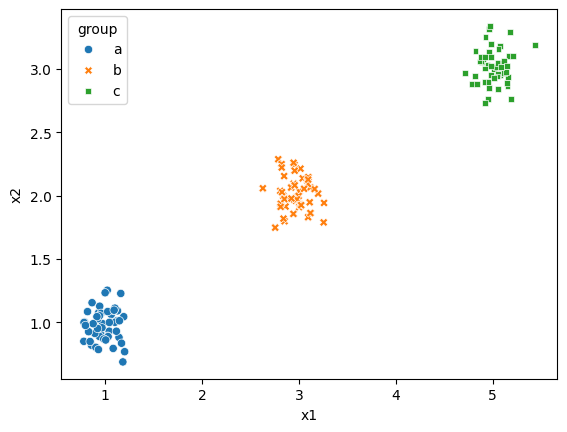

In [3]:
sns.scatterplot(data = df0_125, x = 'x1', y = 'x2', hue = 'group', style = 'group')

<Axes: xlabel='x1', ylabel='x2'>

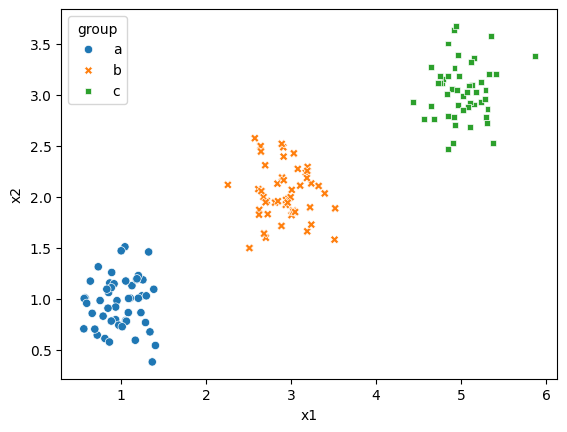

In [4]:
sns.scatterplot(data = df0_25, x = 'x1', y = 'x2', hue = 'group', style = 'group')

<Axes: xlabel='x1', ylabel='x2'>

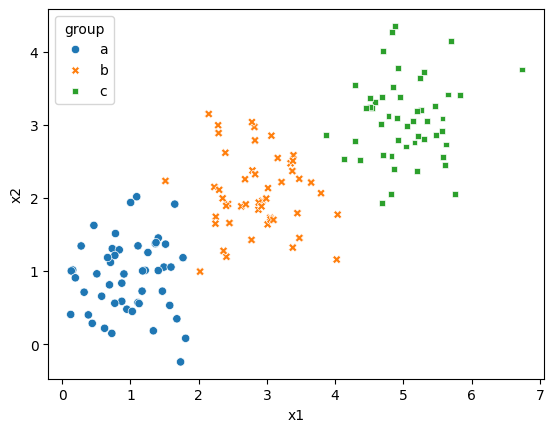

In [7]:
sns.scatterplot(data = df0_5, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

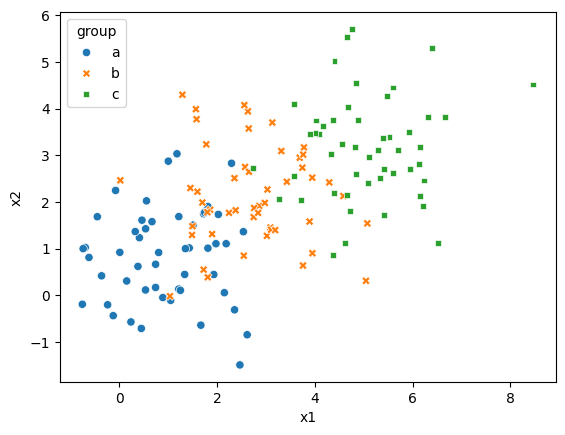

In [5]:
sns.scatterplot(data = df1_0, x = 'x1', y = 'x2', hue = 'group', style = 'group')

<Axes: xlabel='x1', ylabel='x2'>

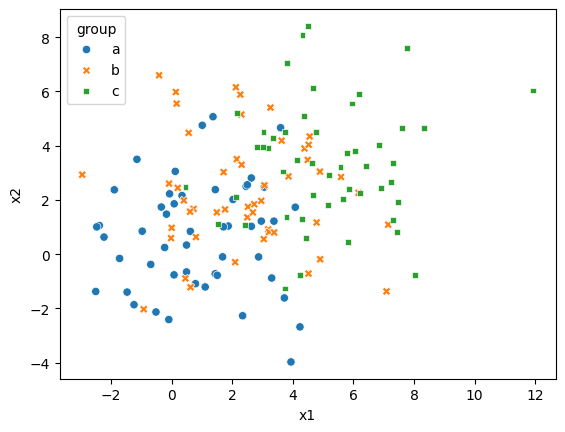

In [6]:
sns.scatterplot(data = df2_0, x = 'x1', y = 'x2', hue = 'group', style = 'group')

As the noise goes up, the clusters spread out more and become less distinct. When the noise=0.5, this is started to be seen and by noise=2.0 the clusters are most spread out and the points are the least distinct.

3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.

In [9]:
def maxmin(x):
    x = (x-min(x))/(max(x)-min(x))
    return x
def scree(data):
  X = data.loc[ : , ['x1','x2'] ]
  X = X.apply(maxmin)
  k_bar = 15
  k_grid = np.arange(1,k_bar+1)
  SSE = np.zeros(k_bar)
  for k in range(k_bar):
    model = KMeans(n_clusters = k+1, max_iter = 300, n_init = 10, random_state = 0)
    model = model.fit(X)
    SSE[k] = model.inertia_
  scree_plot, axes = plt.subplots()
  sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')
  axes.set_ylim(0, 35)

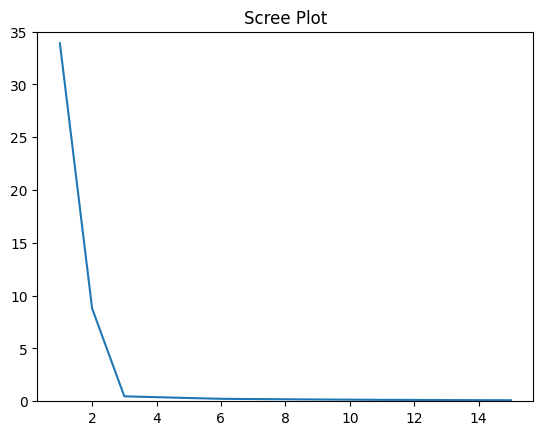

In [13]:
scree(df0_125)

Elbow at k = 3.

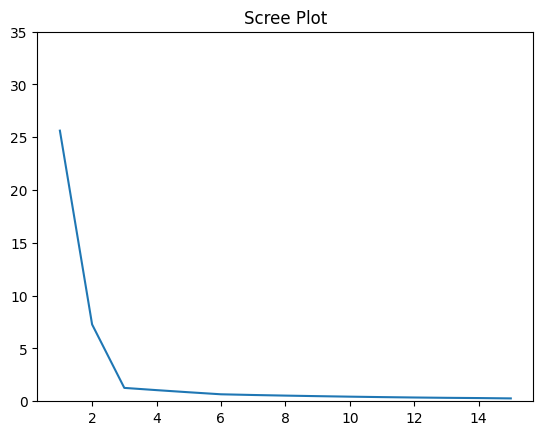

In [14]:
scree(df0_25)

Elbow again at k = 3.

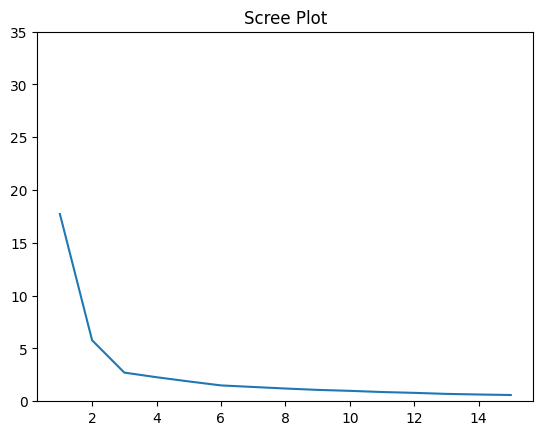

In [15]:
scree(df0_5)

Elbow again at k = 3.

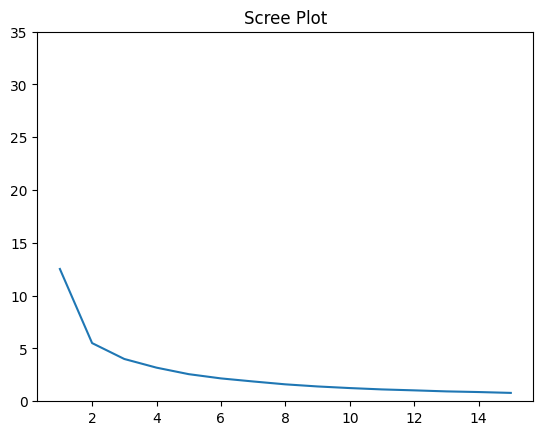

In [16]:
scree(df1_0)

Elbow at k = 2? Not obvious.

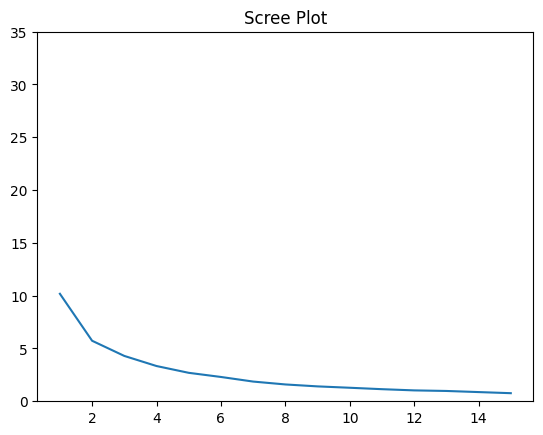

In [17]:
scree(df2_0)

Slight elbow at k = 2? Not completely obvious.

4. Explain the intuition of the elbow, using this numerical simulation as an example.

As the noise increases, and the clusters from #2 become less distinct and overlap, an elbow in the scree plot will become less obvious. This is why in the first scree plot, the elbow was very obvious, as the clusters were distinct and not colliding. In the final scree plot, the elbow is the least distinct, as the clusters have collided and overlapped with one another.

**Q3.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?